<a href="https://colab.research.google.com/github/harshbelani/M.Tech-DS/blob/master/Deep_Learning/DL_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading required packages

In [10]:
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#Importing Cifar100 data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [3]:
print("Train dataset = ", X_train.shape)
print("Train dataset labels = ", y_train.shape)
print("Test dataset = ", X_test.shape)
print("Test dataset labels = ", y_test.shape)

Train dataset =  (50000, 32, 32, 3)
Train dataset labels =  (50000, 1)
Test dataset =  (10000, 32, 32, 3)
Test dataset labels =  (10000, 1)


#normalizing dataset

In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#One-hot encoding of labels

In [5]:
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [8]:
y_test.shape

(10000, 100)

In [9]:
y_train.shape

(50000, 100)

There are 100 categories in Cifar100 dataset.

#Model Building

In [11]:
model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(100,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')
history=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 3.9646 - accuracy: 0.0963 - val_loss: 3.5986 - val_accuracy: 0.1496
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 3.3273 - accuracy: 0.2022 - val_loss: 3.1316 - val_accuracy: 0.2417
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.9764 - accuracy: 0.2668 - val_loss: 2.9229 - val_accuracy: 0.2771
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.7322 - accuracy: 0.3137 - val_loss: 2.8223 - val_accuracy: 0.2995
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.5471 - accuracy: 0.3542 - val_loss: 2.6724 - val_accuracy: 0.3261
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3867 - accuracy: 0.3857 - val_loss: 2.6879 - val_accuracy: 0.3388
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2615 - accuracy: 0.4108 - val_loss: 2.6368 - val_accuracy:

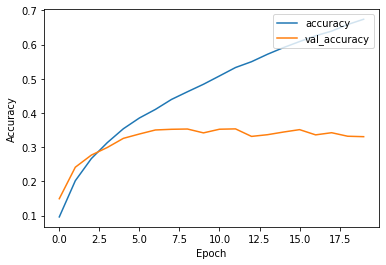

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

Clearly visibile from the difference in the accuracy of the train and val set that the model is overfitting

In [15]:
model.evaluate(X_test,y_test, verbose=2)

313/313 - 1s - loss: 3.7248 - accuracy: 0.3319


[3.724846124649048, 0.3319000005722046]

#Hyper parameter Tuning

We will add some dropout and Batch Normalization layers so that the model doesnt overfit to the train data

In [21]:
from keras.models import Sequential                         
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, Adam, RMSprop

In [27]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model1.add(MaxPooling2D((2,2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(100,activation='softmax'))

In [28]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)       

In [29]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit(X_train,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
1250/1250 [==============================] - 7s 6ms/step - loss: 3.5930 - accuracy: 0.1631 - val_loss: 3.1811 - val_accuracy: 0.2299
Epoch 2/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.7684 - accuracy: 0.3055 - val_loss: 2.8699 - val_accuracy: 0.2937
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3305 - accuracy: 0.3948 - val_loss: 2.2934 - val_accuracy: 0.3996
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 2.0364 - accuracy: 0.4597 - val_loss: 2.1938 - val_accuracy: 0.4234
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8097 - accuracy: 0.5099 - val_loss: 2.2349 - val_accuracy: 0.4280
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6269 - accuracy: 0.5483 - val_loss: 2.1024 - val_accuracy: 0.4652
Epoch 7/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4543 - accuracy: 0.5913 - val_loss: 2.0612 - val_accuracy:

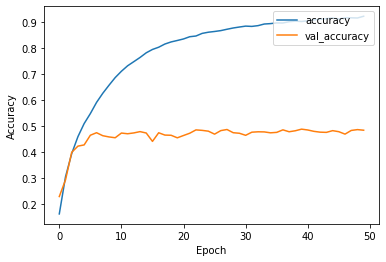

In [31]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

The accuracy improves for both the train and val set but it is still overfitting.

In [32]:
model1.evaluate(X_test,y_test,batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 3.1823 - accuracy: 0.4909


[3.182263135910034, 0.4909000098705292]